In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import skew, norm, kurtosis
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.ticker as ticker  
from sklearn.metrics import r2_score 
from prettytable import PrettyTable 

In [3]:
Location_data= xr.open_dataset('/vftmp/Olivia.Mcredmond/data/cdf files/SANDY_HOOK.nc',decode_times=True)
location_name= Location_data.attrs['location_name']

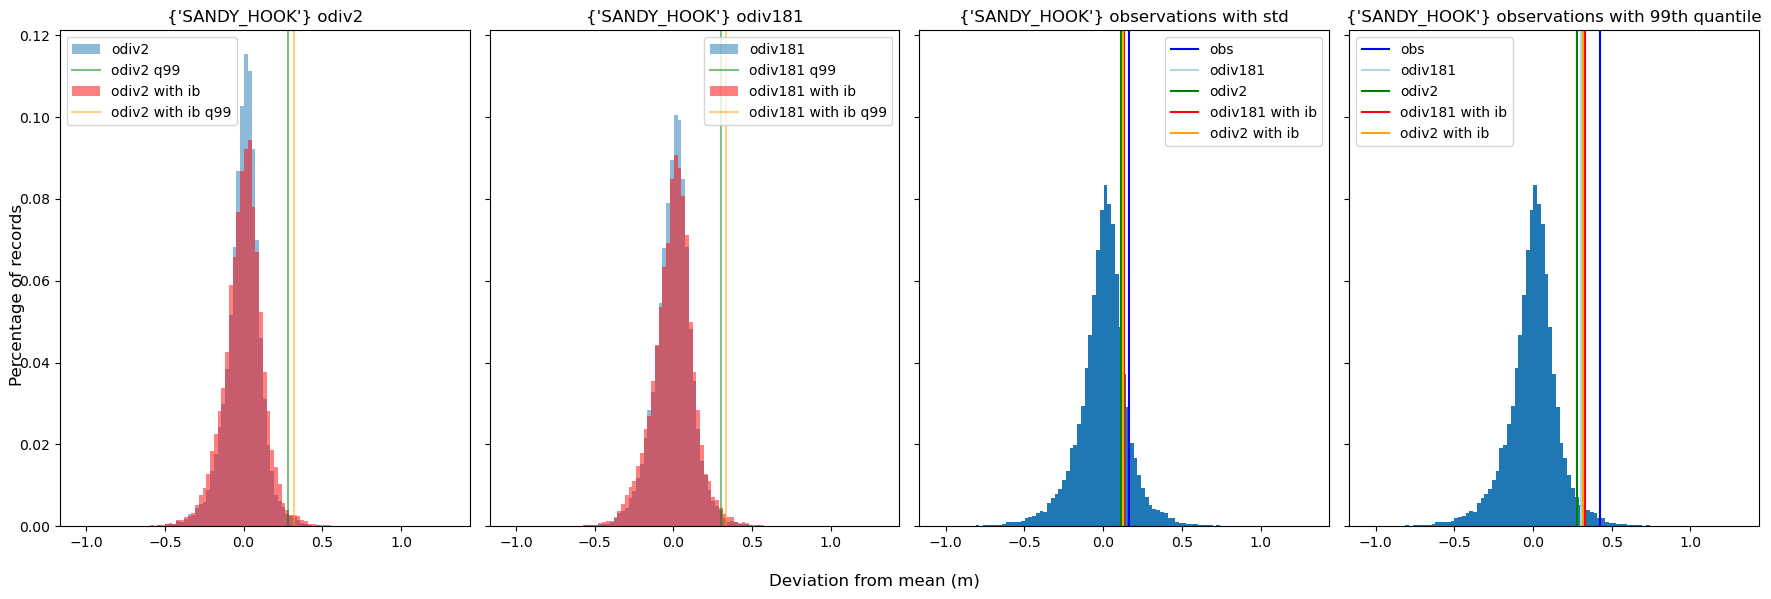

In [4]:
bins=np.linspace(np.float64(Location_data.obs.min()),np.float64(Location_data.obs.max()), 100)
fig, axs = plt.subplots(1, 4, sharex=True, sharey=True, tight_layout=True, figsize=(18,6))

axs[0].hist(Location_data.model_2, bins=bins, weights=1/len(Location_data.model_2) * np.ones(len(Location_data.model_2)),alpha=0.5, label='odiv2')
axs[0].axvline(Location_data.model_2.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[0].set_title(f'{location_name} odiv2')

axs[0].hist(Location_data.model_2_IB, bins=bins, weights=1/len(Location_data.model_2_IB) * np.ones(len(Location_data.model_2_IB)), color='red',alpha=0.5,  label='odiv2 with ib')
axs[0].axvline(Location_data.model_2_IB.quantile(0.99), alpha=0.5, color='orange', label='odiv2 with ib q99')
axs[0].set_title(f'{location_name} odiv2')
axs[0].legend()

axs[1].hist(Location_data.model_181, bins=bins, weights=1/len(Location_data.model_181) * np.ones(len(Location_data.model_181)),alpha=0.5, label='odiv181')
axs[1].axvline(Location_data.model_181.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[1].set_title(f'{location_name} odiv181')

axs[1].hist(Location_data.model_181_IB, bins=bins, color='red',alpha=0.5, weights=1/len(Location_data.model_181_IB) * np.ones(len(Location_data.model_181_IB)), label='odiv181 with ib')
axs[1].axvline(Location_data.model_181_IB.quantile(0.99), alpha=0.5, color='orange', label='odiv181 with ib q99')
axs[1].set_title(f'{location_name} odiv181')
axs[1].legend()

axs[2].hist(Location_data.obs, bins=bins, weights=1/len(Location_data.obs) * np.ones(len(Location_data.obs)))
axs[2].set_title(f'{location_name} observations with std')

axs[2].axvline(Location_data.obs.std(), color='blue', label='obs')
axs[2].axvline(Location_data.model_181.std(), color='lightblue', label='odiv181')
axs[2].axvline(Location_data.model_2.std(), color='green', label='odiv2')
axs[2].axvline(Location_data.model_181_IB.std(), color='red', label='odiv181 with ib')
axs[2].axvline(Location_data.model_2_IB.std(), color='orange',label='odiv2 with ib')
axs[2].legend()

axs[3].hist(Location_data.obs, bins=bins, weights=1/len(Location_data.obs) * np.ones(len(Location_data.obs)))
axs[3].set_title(f'{location_name} observations with 99th quantile')

axs[3].axvline(Location_data.obs.quantile(0.99), color='blue', label='obs')
axs[3].axvline(Location_data.model_181.quantile(0.99), color='lightblue', label='odiv181')
axs[3].axvline(Location_data.model_2.quantile(0.99), color='green', label='odiv2')
axs[3].axvline(Location_data.model_181_IB.quantile(0.99), color='red', label='odiv181 with ib')
axs[3].axvline(Location_data.model_2_IB.quantile(0.99), color='orange',label='odiv2 with ib')
axs[3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')
plt.show()

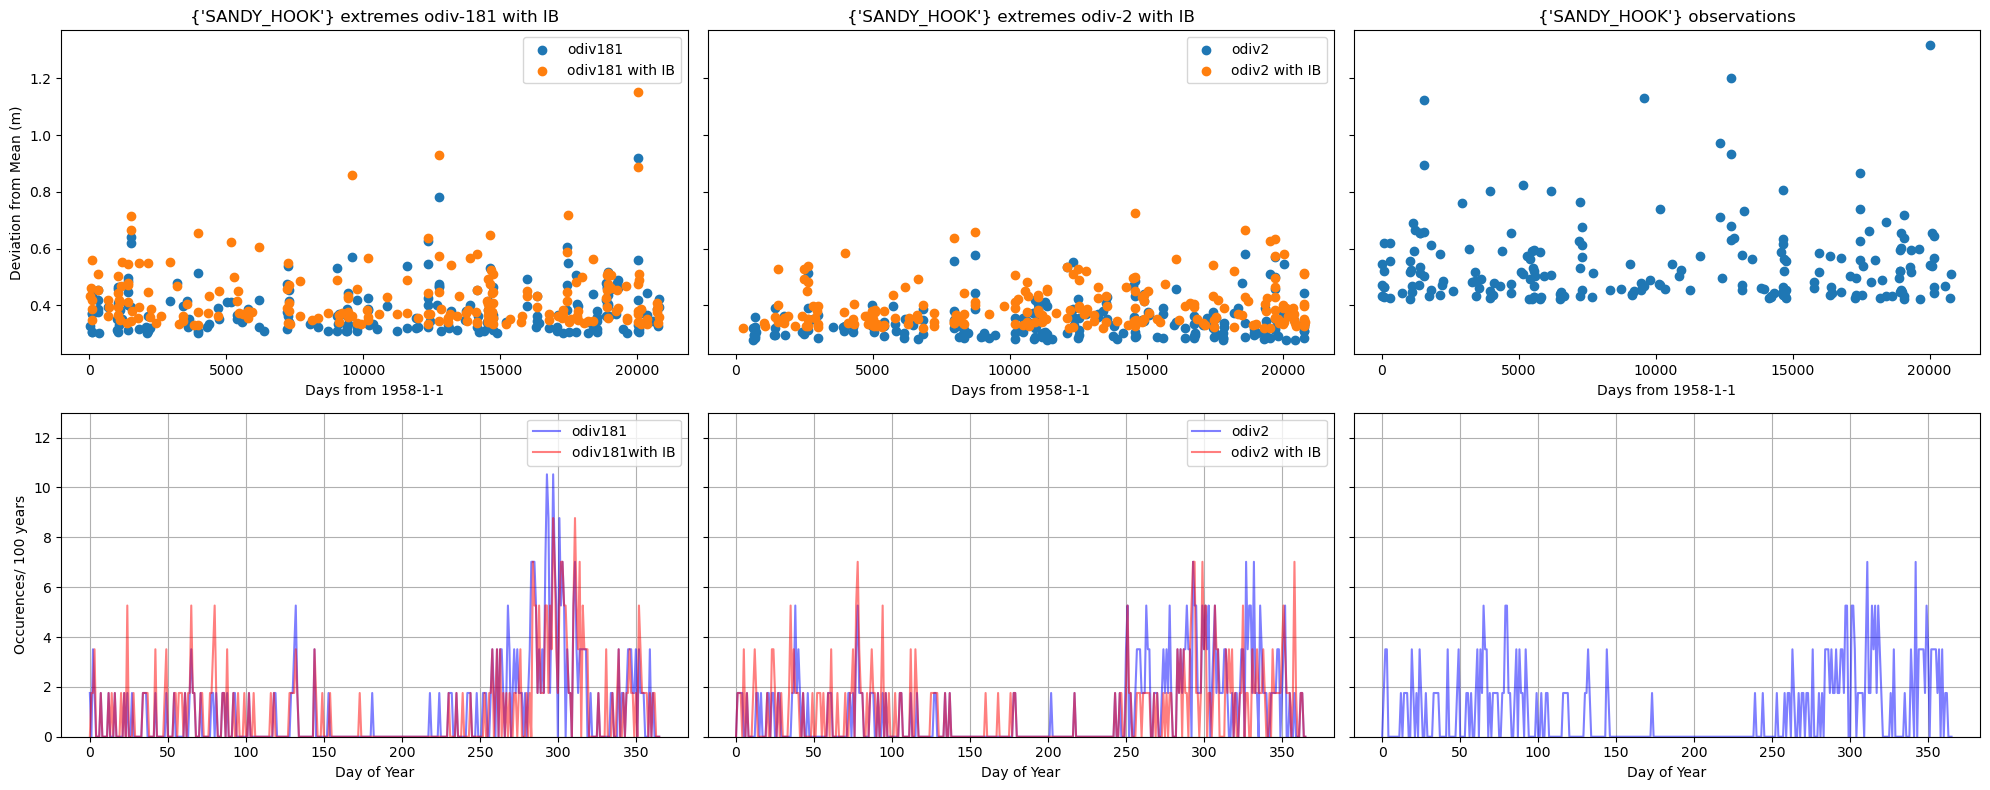

In [5]:
fig, axs = plt.subplots(2, 3, sharey='row', sharex='row', tight_layout=True, figsize=(20,8))#creates subplot layout for each loaction individually

q99 =Location_data.model_181.quantile(0.99) # finds top 1% of events for odiv181
ds_extreme = Location_data.model_181.where(Location_data.model_181>= q99)
dataframe=pd.DataFrame(ds_extreme) #has to be a dataframe to display time on a scatter plot for some reason
axs[0][0].scatter(dataframe.index, ds_extreme, label='odiv181')
axs[0][0].set_title(f'{location_name} extremes odiv-181')
axs[0][0].set_ylabel('Deviation from Mean (m)')
axs[0][0].set_xlabel('Days from 1958-1-1')


occurrences=ds_extreme.groupby(Location_data.model_181.time.dt.dayofyear).count()/(len(Location_data.model_181.time)/(100*365)) #groups extremes based on day of year and then divides by 100*365 to diplay as 100 year flood info
axs[1][0].plot(occurrences, color='blue', alpha=0.5, label='odiv181')
axs[1][0].set_ylabel('Occurences/ 100 years')
axs[1][0].set_xlabel('Day of Year')
axs[1][0].set_ylim(0,13)
axs[1][0].grid()

q99 =Location_data.model_181_IB.quantile(0.99) # same as above but with IB
ds_extreme = Location_data.model_181_IB.where(Location_data.model_181_IB>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][0].scatter(dataframe.index, ds_extreme, label='odiv181 with IB')
axs[0][0].set_title(f'{location_name} extremes odiv-181 with IB')
axs[0][0].set_ylabel('Deviation from Mean (m)')
axs[0][0].set_xlabel('Days from 1958-1-1')
axs[0][0].legend()

occurrences=ds_extreme.groupby(Location_data.model_181_IB.time.dt.dayofyear).count()/(len(Location_data.model_181_IB.time)/(100*365))# same as above but with IB
axs[1][0].plot(occurrences, color='red', alpha=0.5, label='odiv181with IB')
axs[1][0].set_ylabel('Occurences/ 100 years')
axs[1][0].set_xlabel('Day of Year')
axs[1][0].set_ylim(0,13)
axs[1][0].legend()

q99 =Location_data.model_2.quantile(0.99) # finds top 1% of events for odiv2
ds_extreme = Location_data.model_2.where(Location_data.model_2>= q99)
dataframe=pd.DataFrame(ds_extreme) #has to be a dataframe to display time on a scatter plot for some reason
axs[0][1].scatter(dataframe.index, ds_extreme, label='odiv2')
axs[0][1].set_title(f'{location_name} extremes odiv-2')
axs[0][1].set_xlabel('Days from 1958-1-1')

occurrences=ds_extreme.groupby(Location_data.model_2.time.dt.dayofyear).count()/(len(Location_data.model_2.time)/(100*365))#groups extremes based on day of year and then divides by 100*365 to diplay as 100 year flood info
axs[1][1].plot(occurrences, color='blue', alpha=0.5, label='odiv2')
axs[1][1].set_xlabel('Day of Year')
axs[1][1].set_ylim(0,13)
axs[1][1].grid()

q99 =Location_data.model_2_IB.quantile(0.99) # same as above but with IB
ds_extreme = Location_data.model_2_IB.where(Location_data.model_2_IB>= q99)
dataframe=pd.DataFrame(ds_extreme)
axs[0][1].scatter(dataframe.index, ds_extreme, label='odiv2 with IB')
axs[0][1].set_title(f'{location_name} extremes odiv-2 with IB')
axs[0][1].set_xlabel('Days from 1958-1-1')
axs[0][1].legend()

occurrences=ds_extreme.groupby(Location_data.model_2_IB.time.dt.dayofyear).count()/(len(Location_data.model_2_IB.time)/(100*365)) # same as above but with IB
axs[1][1].plot(occurrences, color='red', alpha=0.5, label='odiv2 with IB')
axs[1][1].set_xlabel('Day of Year')
axs[1][1].set_ylim(0,13)
axs[1][1].legend()

q99 =Location_data.obs.quantile(0.99)# finds top 1% of events for odiv2
ds_extreme = Location_data.obs.where(Location_data.obs>= q99)
dataframe=pd.DataFrame(ds_extreme) #has to be a dataframe to display time on a scatter plot for some reason
axs[0][2].scatter(dataframe.index, ds_extreme)
axs[0][2].set_title(f'{location_name} observations')
axs[0][2].set_xlabel('Days from 1958-1-1')

occurrences=ds_extreme.groupby(Location_data.obs.datetime.dt.dayofyear).count()/(len(Location_data.obs.datetime)/(100*365))#groups extremes based on day of year and then divides by 100*365 to diplay as 100 year flood info
axs[1][2].plot(occurrences, color='blue', alpha=0.5)
axs[1][2].set_xlabel('Day of Year')
axs[1][2].set_ylim(0,13)
axs[1][2].grid()

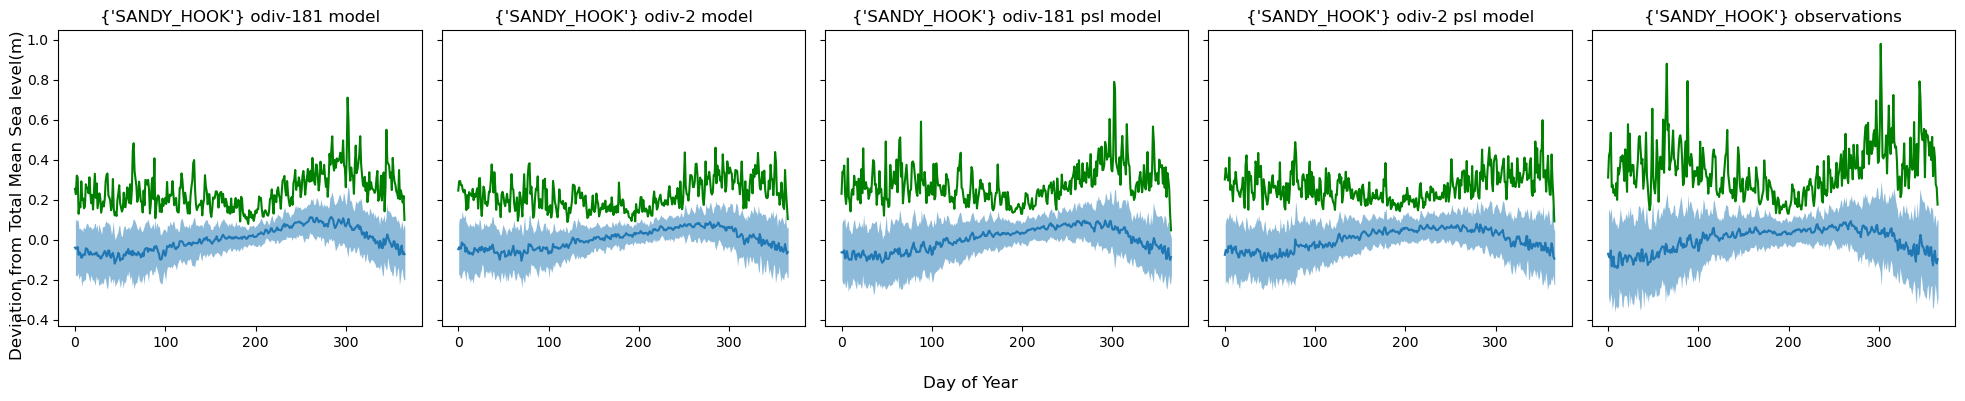

In [6]:
fig, axs = plt.subplots(1, 5, sharex=False, sharey=True, tight_layout=True, figsize=(20,4)) #creates subplot layout for each loaction individually

#odiv181
seasonal_stdev = Location_data.model_181.groupby(Location_data.model_181.time.dt.dayofyear).std() #find std for each day of the year
seasonal_mean = Location_data.model_181.groupby(Location_data.model_181.time.dt.dayofyear).mean()  #find mean for each day of the year
seasonal_q99 = Location_data.model_181.groupby(Location_data.model_181.time.dt.dayofyear).quantile(0.99) #find top 1% for each day of the year
axs[0].plot(seasonal_mean, label='daily mean') # Plots everything above
axs[0].plot(seasonal_q99, color='green', label='99th quantile') 
axs[0].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev') # plot std in reference to mean
axs[0].set_title(f'{location_name} odiv-181 model')

#odiv2
seasonal_stdev = Location_data.model_2.groupby(Location_data.model_2.time.dt.dayofyear).std()
seasonal_mean = Location_data.model_2.groupby(Location_data.model_2.time.dt.dayofyear).mean()
seasonal_q99 = Location_data.model_2.groupby(Location_data.model_2.time.dt.dayofyear).quantile(0.99)
axs[1].plot(seasonal_mean, label='daily mean')
axs[1].plot(seasonal_q99, color='green', label='99th quantile')
axs[1].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[1].set_title(f'{location_name} odiv-2 model')

#odiv181 with IB
seasonal_stdev = Location_data.model_181_IB.groupby(Location_data.model_181_IB.time.dt.dayofyear).std()
seasonal_mean = Location_data.model_181_IB.groupby(Location_data.model_181_IB.time.dt.dayofyear).mean()
seasonal_q99 = Location_data.model_181_IB.groupby(Location_data.model_181_IB.time.dt.dayofyear).quantile(0.99)
axs[2].plot(seasonal_mean, label='daily mean')
axs[2].plot(seasonal_q99, color='green', label='99th quantile')
axs[2].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[2].set_title(f'{location_name} odiv-181 psl model')

#odiv2 with IB
seasonal_stdev = Location_data.model_2_IB.groupby(Location_data.model_2_IB.time.dt.dayofyear).std()
seasonal_mean = Location_data.model_2_IB.groupby(Location_data.model_2_IB.time.dt.dayofyear).mean()
seasonal_q99 = Location_data.model_2_IB.groupby(Location_data.model_2_IB.time.dt.dayofyear).quantile(0.99)
axs[3].plot(seasonal_mean, label='daily mean')
axs[3].plot(seasonal_q99, color='green', label='99th quantile')
axs[3].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[3].set_title(f'{location_name} odiv-2 psl model')

#observations
seasonal_stdev = Location_data.obs.groupby(Location_data.obs.datetime.dt.dayofyear).std()
seasonal_mean = Location_data.obs.groupby(Location_data.obs.datetime.dt.dayofyear).mean()
seasonal_q99 = Location_data.obs.groupby(Location_data.obs.datetime.dt.dayofyear).quantile(0.99)
axs[4].plot(seasonal_mean, label='daily mean')
axs[4].plot(seasonal_q99, color='green', label='99th quantile')
axs[4].fill_between(seasonal_mean.dayofyear, seasonal_mean+seasonal_stdev,seasonal_mean-seasonal_stdev, alpha=0.5,label='daily stdev')
axs[4].set_title(f'{location_name} observations')

fig.supxlabel('Day of Year')
fig.supylabel('Deviation from Total Mean Sea level(m)')
plt.show()

Text(-1, 1, '$y=0.897\\;x-0.000$\n$r^2= 0.681$\n$y=0.787\\;x+0.031$\n$r^2= 0.516$')

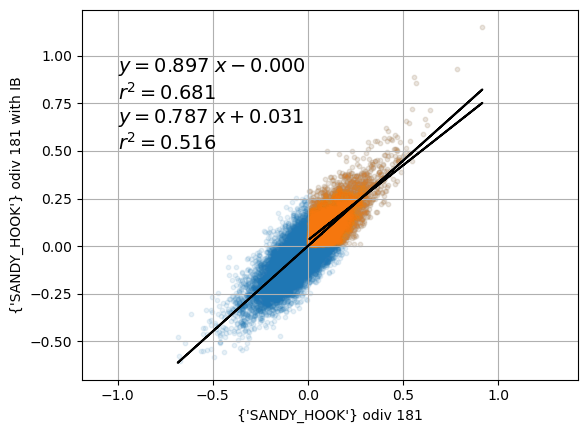

In [22]:
plt.scatter(Location_data.model_181, Location_data.model_181_IB, alpha=0.1, s=10)
x = np.polyfit(Location_data.model_181, Location_data.model_181_IB, 1)#Find coeficients of 1st degree polnomial fit (linear equation)
y = np.poly1d(x)#recreates function
r2 = round(r2_score(Location_data.model_181_IB, y(Location_data.model_181)),3)#finds r^2
plt.plot(Location_data.model_181, y(Location_data.model_181), color='black')
text = f'$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n$r^2= {r2}$'#equation for linear fit and r^2
plt.xlabel(f'{location_name} odiv 181')
plt.ylabel(f'{location_name} odiv 181 with IB')
plt.axis('equal')
plt.grid()
#plt.xaxis.major_locator(ticker.MultipleLocator(0.1)) #adjust tick marks
#plt.yaxis.major_locator(ticker.MultipleLocator(0.1)) 


extreme_181= Location_data.model_181.where((Location_data.model_181>=Location_data.model_181.quantile(0.50)) & (Location_data.model_181_IB>=Location_data.model_181_IB.quantile(0.50)))#find top 50% of events
extreme_psl181=Location_data.model_181_IB.where((Location_data.model_181>=Location_data.model_181.quantile(0.50)) & (Location_data.model_181_IB>=Location_data.model_181_IB.quantile(0.50)))

extreme_nan= np.array(extreme_181) # deletes nans from data
extreme_181_nan=extreme_181[np.logical_not(np.isnan(extreme_nan))]
extreme_psl181_nan=extreme_psl181[np.logical_not(np.isnan(extreme_nan))]
plt.scatter(extreme_181_nan, extreme_psl181_nan, alpha=0.1, s=10)


x = np.polyfit(extreme_181_nan, extreme_psl181_nan, 1) # Finds coeficients of 1st degree polnomial fit (linear equation) for extremes
y = np.poly1d(x) # recreates function
r2 = round(r2_score(extreme_psl181_nan, y(extreme_181_nan)),3)#find r^2
plt.plot(extreme_181_nan, y(extreme_181_nan), color='black')
text = text + f'\n$y={x[0]:0.3f}\;x{x[1]:+0.3f}$\n$r^2= {r2}$' #equation for linear fit of extremes and r^2
plt.text(-1, 1, s=text,fontsize=14, verticalalignment='top', horizontalalignment='left')

/vftmp/Olivia.Mcredmond/pid208231/ipykernel_35351/2297875737.py:63: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myTable1.add_row(['Observations',f'{round(float(obs.sealevel_tr.mean()), 3)}', f'{round(float(obs.sealevel_tr.std()), 3)}', f'{round(float(pd.DataFrame(obs.sealevel_tr).skew()), 3)}', f'{round(float(pd.DataFrame(obs.sealevel_tr).kurtosis()), 3)}', f'{round(float(obs.sealevel_tr.quantile(0.99)),3)}'])


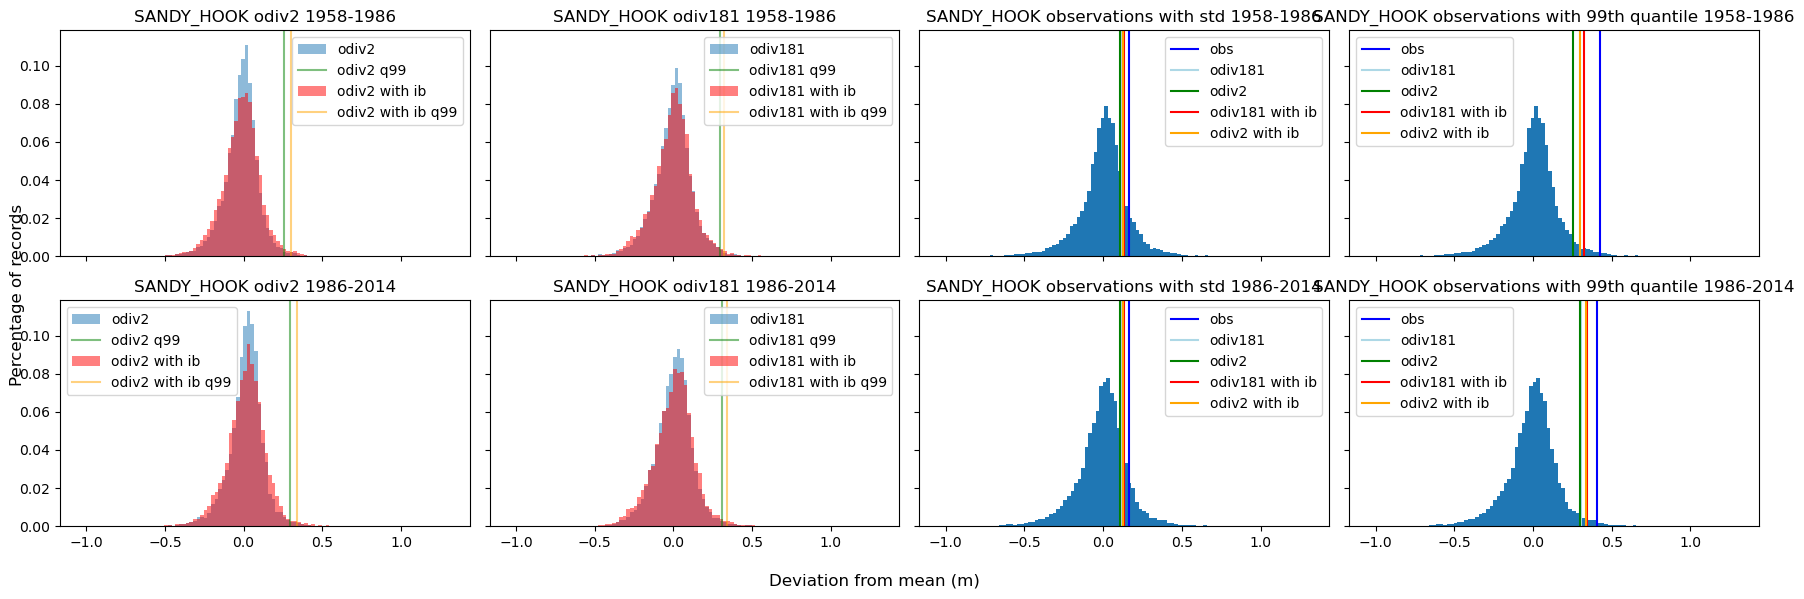

+------------------+-----------+-------------------------+--------+----------+--------------------+
|  Figure Source   | Mean (m)  | Standard Deviation (m)  |  Skew  | Kurtosis | 99th Quantile (m)  |
+------------------+-----------+-------------------------+--------+----------+--------------------+
|     Odiv 181     |   -0.003  |          0.122          | -0.285 |  1.937   |       0.298        |
|      Odiv 2      |   -0.016  |          0.108          | -0.479 |  2.549   |       0.257        |
| Odiv 181 with IB |   -0.004  |           0.13          | -0.207 |   1.68   |       0.323        |
|  Odiv 2 with IB  |   -0.016  |          0.123          | -0.086 |  1.685   |       0.298        |
|   Observations   |    -0.0   |          0.162          | -0.285 |  3.496   |       0.422        |
+------------------+-----------+-------------------------+--------+----------+--------------------+
+------------------+-----------+-------------------------+--------+----------+--------------------+


/vftmp/Olivia.Mcredmond/pid208231/ipykernel_35351/2297875737.py:127: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  myTable2.add_row(['Observations',f'{round(float(obs.sealevel_tr.mean()), 3)}', f'{round(float(obs.sealevel_tr.std()), 3)}', f'{round(float(pd.DataFrame(obs.sealevel_tr).skew()), 3)}', f'{round(float(pd.DataFrame(obs.sealevel_tr).kurtosis()), 3)}', f'{round(float(obs.sealevel_tr.quantile(0.99)),3)}'])


In [34]:
year_start= 1958
year_end= 1986

pt1_2= Location_data.model_2.sel(time=slice(f'{year_start}-01-01', f'{year_end}-12-31'))
pt1_181= Location_data.model_181.sel(time=slice(f'{year_start}-01-01', f'{year_end}-12-31'))
pt1_2_IB =(Location_data.model_2_IB.sel(time=slice(f'{year_start}-01-01', f'{year_end}-12-31')))
pt1_181_IB=(Location_data.model_181_IB.sel(time=slice(f'{year_start}-01-01', f'{year_end}-12-31')))

obs_pt1=obs.sel(datetime=slice(f'{year_start}-01-01', f'{year_end}-12-31'))

bins=np.linspace(np.float64(obs_pt1.sealevel_tr.min()),np.float64(obs_pt1.sealevel_tr.max()), 100)
fig, axs = plt.subplots(2, 4, sharex=True, sharey=True, tight_layout=True, figsize=(18,6))

axs[0][0].hist(pt1_2, bins=bins, weights=1/len(pt1_2) * np.ones(len(pt1_2)),alpha=0.5, label='odiv2')
axs[0][0].axvline(pt1_2.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[0][0].set_title(f'{location_name} odiv2 {year_start}-{year_end}')

axs[0][0].hist(pt1_2_IB, bins=bins, weights=1/len(pt1_2_IB) * np.ones(len(pt1_2_IB)), color='red',alpha=0.5,  label='odiv2 with ib')
axs[0][0].axvline(pt1_2_IB.quantile(0.99), alpha=0.5, color='orange', label='odiv2 with ib q99')
axs[0][0].set_title(f'{location_name} odiv2 {year_start}-{year_end}')
axs[0][0].legend()

axs[0][1].hist(pt1_181, bins=bins, weights=1/len(pt1_181) * np.ones(len(pt1_181)),alpha=0.5, label='odiv181')
axs[0][1].axvline(pt1_181.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[0][1].set_title(f'{location_name} odiv181{year_start}-{year_end}')

axs[0][1].hist(pt1_181_IB, bins=bins, color='red',alpha=0.5, weights=1/len(pt1_181_IB) * np.ones(len(pt1_181_IB)), label='odiv181 with ib')
axs[0][1].axvline(pt1_181_IB.quantile(0.99), alpha=0.5, color='orange', label='odiv181 with ib q99')
axs[0][1].set_title(f'{location_name} odiv181 {year_start}-{year_end}')
axs[0][1].legend()

axs[0][2].hist(obs_pt1.sealevel_tr, bins=bins, weights=1/len(obs_pt1.sealevel_tr) * np.ones(len(obs_pt1.sealevel_tr)))
axs[0][2].set_title(f'{location_name} observations with std {year_start}-{year_end}')

axs[0][2].axvline(obs_pt1.sealevel_tr.std(), color='blue', label='obs')
axs[0][2].axvline(pt1_181.std(), color='lightblue', label='odiv181')
axs[0][2].axvline(pt1_2.std(), color='green', label='odiv2')
axs[0][2].axvline(pt1_181_IB.std(), color='red', label='odiv181 with ib')
axs[0][2].axvline(pt1_2_IB.std(), color='orange',label='odiv2 with ib')
axs[0][2].legend()

axs[0][3].hist(obs_pt1.sealevel_tr, bins=bins, weights=1/len(obs_pt1.sealevel_tr) * np.ones(len(obs_pt1.sealevel_tr)))
axs[0][3].set_title(f'{location_name} observations with 99th quantile {year_start}-{year_end}')

axs[0][3].axvline(obs_pt1.sealevel_tr.quantile(0.99), color='blue', label='obs')
axs[0][3].axvline(pt1_181.quantile(0.99), color='lightblue', label='odiv181')
axs[0][3].axvline(pt1_2.quantile(0.99), color='green', label='odiv2')
axs[0][3].axvline(pt1_181_IB.quantile(0.99), color='red', label='odiv181 with ib')
axs[0][3].axvline(pt1_2_IB.quantile(0.99), color='orange',label='odiv2 with ib')
axs[0][3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')

# Specify the Column Names while initializing the Table 
myTable1 = PrettyTable(['Figure Source', 'Mean (m) ', 'Standard Deviation (m) ', 'Skew', 'Kurtosis', '99th Quantile (m) ']) 
 
# Add rows 
myTable1.add_row(['Odiv 181',f'{round(float(pt1_181.mean()), 3)}', f'{round(float(pt1_181.std()), 3)}', f'{round(float(skew(pt1_181, bias=False)), 3)}', f'{round(float(kurtosis(pt1_181, bias=False)), 3)}', f'{round(float(pt1_181.quantile(0.99)),3)}']) 
myTable1.add_row(['Odiv 2',f'{round(float(pt1_2.mean()), 3)}',f'{round(float(pt1_2.std()), 3)}', f'{round(float(skew(pt1_2, bias=False)), 3)}', f'{round(float(kurtosis(pt1_2, bias=False)), 3)}', f'{round(float(pt1_2.quantile(0.99)),3)}']) 
myTable1.add_row(['Odiv 181 with IB',f'{round(float(pt1_181_IB.mean()), 3)}', f'{round(float(pt1_181_IB.std()), 3)}', f'{round(float(skew(pt1_2_IB, bias=False)), 3)}', f'{round(float(kurtosis(pt1_181_IB, bias=False)), 3)}', f'{round(float(pt1_181_IB.quantile(0.99)),3)}']) 
myTable1.add_row(['Odiv 2 with IB',f'{round(float(pt1_2_IB.mean()), 3)}', f'{round(float(pt1_2_IB.std()), 3)}', f'{round(float(skew(pt1_181_IB, bias=False)), 3)}', f'{round(float(kurtosis(pt1_2_IB, bias=False)), 3)}', f'{round(float(pt1_2_IB.quantile(0.99)),3)}']) 
myTable1.add_row(['Observations',f'{round(float(Location_data.obs.mean()), 3)}', f'{round(float(Location_data.obs.std()), 3)}', f'{round(float(pd.DataFrame(Location_data.obs).skew()), 3)}', f'{round(float(pd.DataFrame(Location_data.obs).kurtosis()), 3)}', f'{round(float(Location_data.obs.quantile(0.99)),3)}']) 
##################################################################

year_start= 1986
year_end= 2014

pt2_2= Location_data.model_2.sel(time=slice(f'{year_start}-01-01', f'{year_end}-12-31'))
pt2_181= Location_data.model_181.sel(time=slice(f'{year_start}-01-01', f'{year_end}-12-31'))
pt2_2_IB =(Location_data.model_2_IB.sel(time=slice(f'{year_start}-01-01', f'{year_end}-12-31')))
pt2_181_IB=(Location_data.model_181_IB.sel(time=slice(f'{year_start}-01-01', f'{year_end}-12-31')))
obs_pt2=obs.sel(datetime=slice(f'{year_start}-01-01', f'{year_end}-12-31'))

bins=np.linspace(np.float64(obs_pt2.sealevel_tr.min()),np.float64(obs_pt2.sealevel_tr.max()), 100)

axs[1][0].hist(pt2_2, bins=bins, weights=1/len(pt2_2) * np.ones(len(pt2_2)),alpha=0.5, label='odiv2')
axs[1][0].axvline(pt2_2.quantile(0.99), alpha=0.5, color='green', label='odiv2 q99')
axs[1][0].set_title(f'{location_name} odiv2{year_start}-{year_end}')

axs[1][0].hist(pt2_2_IB, bins=bins, weights=1/len(pt2_2_IB) * np.ones(len(pt2_2_IB)), color='red',alpha=0.5,  label='odiv2 with ib')
axs[1][0].axvline(pt2_2_IB.quantile(0.99), alpha=0.5, color='orange', label='odiv2 with ib q99')
axs[1][0].set_title(f'{location_name} odiv2 {year_start}-{year_end}')
axs[1][0].legend()

axs[1][1].hist(pt2_181, bins=bins, weights=1/len(pt2_181) * np.ones(len(pt2_181)),alpha=0.5, label='odiv181')
axs[1][1].axvline(pt2_181.quantile(0.99), alpha=0.5, color='green',  label='odiv181 q99')
axs[1][1].set_title(f'{location_name} odiv181')

axs[1][1].hist(pt2_181_IB, bins=bins, color='red',alpha=0.5, weights=1/len(pt2_181_IB) * np.ones(len(pt2_181_IB)), label='odiv181 with ib')
axs[1][1].axvline(pt2_181_IB.quantile(0.99), alpha=0.5, color='orange', label='odiv181 with ib q99')
axs[1][1].set_title(f'{location_name} odiv181 {year_start}-{year_end}')
axs[1][1].legend()

axs[1][2].hist(obs_pt2.sealevel_tr, bins=bins, weights=1/len(obs_pt2.sealevel_tr) * np.ones(len(obs_pt2.sealevel_tr)))
axs[1][2].set_title(f'{location_name} observations with std {year_start}-{year_end}')

axs[1][2].axvline(obs_pt2.sealevel_tr.std(), color='blue', label='obs')
axs[1][2].axvline(pt2_181.std(), color='lightblue', label='odiv181')
axs[1][2].axvline(pt2_2.std(), color='green', label='odiv2')
axs[1][2].axvline(pt2_181_IB.std(), color='red', label='odiv181 with ib')
axs[1][2].axvline(pt2_2_IB.std(), color='orange',label='odiv2 with ib')
axs[1][2].legend()

axs[1][3].hist(obs_pt2.sealevel_tr, bins=bins, weights=1/len(obs_pt2.sealevel_tr) * np.ones(len(obs_pt2.sealevel_tr)))
axs[1][3].set_title(f'{location_name} observations with 99th quantile {year_start}-{year_end}')

axs[1][3].axvline(obs_pt2.sealevel_tr.quantile(0.99), color='blue', label='obs')
axs[1][3].axvline(pt2_181.quantile(0.99), color='lightblue', label='odiv181')
axs[1][3].axvline(pt2_2.quantile(0.99), color='green', label='odiv2')
axs[1][3].axvline(pt2_181_IB.quantile(0.99), color='red', label='odiv181 with ib')
axs[1][3].axvline(pt2_2_IB.quantile(0.99), color='orange',label='odiv2 with ib')
axs[1][3].legend()

fig.supylabel('Percentage of records')
fig.supxlabel('Deviation from mean (m)')
plt.show()

# Specify the Column Names while initializing the Table 
myTable2 = PrettyTable(['Figure Source', 'Mean (m) ', 'Standard Deviation (m) ', 'Skew', 'Kurtosis', '99th Quantile (m) ']) 
 
# Add rows 
myTable2.add_row(['Odiv 181',f'{round(float(pt2_181.mean()), 3)}', f'{round(float(pt2_181.std()), 3)}', f'{round(float(skew(pt2_181, bias=False)), 3)}', f'{round(float(kurtosis(pt2_181, bias=False)), 3)}', f'{round(float(pt2_181.quantile(0.99)),3)}']) 
myTable2.add_row(['Odiv 2',f'{round(float(pt2_2.mean()), 3)}',f'{round(float(pt2_2.std()), 3)}', f'{round(float(skew(pt2_2, bias=False)), 3)}', f'{round(float(kurtosis(pt2_2, bias=False)), 3)}', f'{round(float(pt2_2.quantile(0.99)),3)}']) 
myTable2.add_row(['Odiv 181 with IB',f'{round(float(pt2_181_IB.mean()), 3)}', f'{round(float(pt2_181_IB.std()), 3)}', f'{round(float(skew(pt2_2_IB, bias=False)), 3)}', f'{round(float(kurtosis(pt2_181_IB, bias=False)), 3)}', f'{round(float(pt2_181_IB.quantile(0.99)),3)}']) 
myTable2.add_row(['Odiv 2 with IB',f'{round(float(pt2_2_IB.mean()), 3)}', f'{round(float(pt2_2_IB.std()), 3)}', f'{round(float(skew(pt2_181_IB, bias=False)), 3)}', f'{round(float(kurtosis(pt2_2_IB, bias=False)), 3)}', f'{round(float(pt2_2_IB.quantile(0.99)),3)}']) 
myTable2.add_row(['Observations',f'{round(float(Location_data.obs.mean()), 3)}', f'{round(float(Location_data.obs.std()), 3)}', f'{round(float(pd.DataFrame(Location_data.obs).skew()), 3)}', f'{round(float(pd.DataFrame(Location_data.obs).kurtosis()), 3)}', f'{round(float(Location_data.obs.quantile(0.99)),3)}']) 

print(myTable1)
print(myTable2)
